In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import missingno
from statsmodels.stats.outliers_influence import variance_inflation_factor

from sklearn.linear_model import Lasso
from sklearn.linear_model import LassoCV
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import Normalizer

from sklearn.svm import SVC

from imblearn.combine import SMOTETomek
from imblearn.under_sampling import TomekLinks
from imblearn.under_sampling import OneSidedSelection
from imblearn.under_sampling import CondensedNearestNeighbour
from imblearn.combine import SMOTEENN

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, classification_report, precision_score, recall_score

In [2]:
pd.set_option("display.max_columns", 150)
pd.set_option("display.max_rows", 150)

In [3]:
custom_palette = ['#33A4FF', '#FFB733', '#9FF767']
sns.set_palette(custom_palette)

In [4]:
df = pd.read_csv("df_2030_ver_1.csv")
df

,age,sight_left,sight_right,SBP,DBP,HDL_chole,LDL_chole,triglyceride,hemoglobin,urine_protein,SGOT_AST,SGOT_ALT,gamma_GTP,SMK_stat_type_cd,DRK_YN,diabete,bmi
0,3,1.0,1.0,120.0,80.0,48.0,126.0,92.0,17.1,1,21.0,35.0,40.0,1,1,0,25.951557
1,2,0.9,1.2,130.0,82.0,55.0,148.0,121.0,15.8,1,20.0,36.0,27.0,3,0,1,24.691358
2,3,1.2,1.0,132.0,80.0,58.0,107.0,101.0,14.4,1,18.0,18.0,35.0,3,1,0,21.224490
3,2,1.2,1.2,118.0,72.0,55.0,129.0,77.0,15.7,1,13.0,16.0,19.0,1,1,0,24.489796
4,2,0.9,1.0,129.0,77.0,53.0,108.0,219.0,14.5,1,21.0,24.0,58.0,1,0,0,19.531250
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
248662,3,0.7,0.9,110.0,80.0,57.0,140.0,59.0,12.9,1,25.0,12.0,13.0,1,1,0,27.055151
248663,3,1.0,1.0,113.0,69.0,63.0,92.0,88.0,13.3,1,20.0,17.0,12.0,1,0,0,25.711662
248664,0,1.0,1.5,105.0,70.0,72.0,120.0,92.0,15.4,1,25.0,26.0,50.0,2,1,0,21.224490
248665,3,1.0,1.5,119.0,83.0,40.0,84.0,45.0,15.8,1,14.0,17.0,15.0,1,0,0,25.951557


In [13]:
df.diabete.value_counts()

0    194394
1     49606
2      4667
Name: diabete, dtype: int64

In [5]:
df_sample = df.sample(n=30000)

,Description,Value
0,Session id,3808
1,Target,diabete
2,Target type,Multiclass
3,Original data shape,"(248667, 17)"
4,Transformed data shape,"(248667, 17)"
5,Transformed train set shape,"(174066, 17)"
6,Transformed test set shape,"(74601, 17)"
7,Numeric features,16
8,Preprocess,True
9,Imputation type,simple


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.6185,0.0000,0.6185,0.7228,0.6457,0.1359,0.1538
1,0.6605,0.0000,0.6605,0.7286,0.6824,0.2002,0.2128
2,0.7812,0.0000,0.7812,0.6846,0.6881,0.0096,0.0421
3,0.5373,0.0000,0.5373,0.7422,0.5763,0.1494,0.1944
4,0.7309,0.0000,0.7309,0.7056,0.7177,0.1658,0.1670
5,0.7756,0.0000,0.7756,0.6689,0.6882,0.0167,0.0383
6,0.7819,0.0000,0.7819,0.6855,0.6884,0.0080,0.0396
7,0.7731,0.0000,0.7731,0.6996,0.6884,0.0443,0.0802
8,0.7817,0.0000,0.7817,0.7060,0.6922,0.0195,0.0606


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

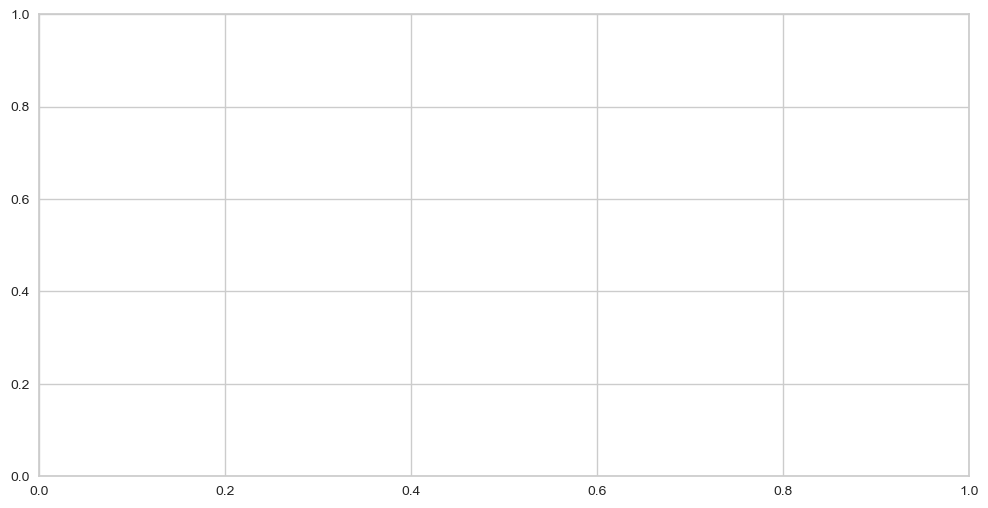

In [7]:
from pycaret.classification import *
exp_name = setup(data =  df,  target = 'diabete')
evaluate_model(create_model('svm'))

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.7816,0.0000,0.7816,0.6111,0.6859,0.0000,0.0011
1,0.7818,0.0000,0.7818,0.8106,0.6862,0.0008,0.0203
2,0.7817,0.0000,0.7817,0.6111,0.6859,0.0000,0.0000
3,0.7818,0.0000,0.7818,0.8106,0.6861,0.0004,0.0144
4,0.7819,0.0000,0.7819,0.8107,0.6863,0.0008,0.0203
5,0.7818,0.0000,0.7818,0.6777,0.6861,0.0005,0.0092
6,0.7818,0.0000,0.7818,0.6112,0.6861,0.0000,0.0000
7,0.7818,0.0000,0.7818,0.7110,0.6862,0.0003,0.0075
8,0.7817,0.0000,0.7817,0.6112,0.6860,-0.0001,-0.0038


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

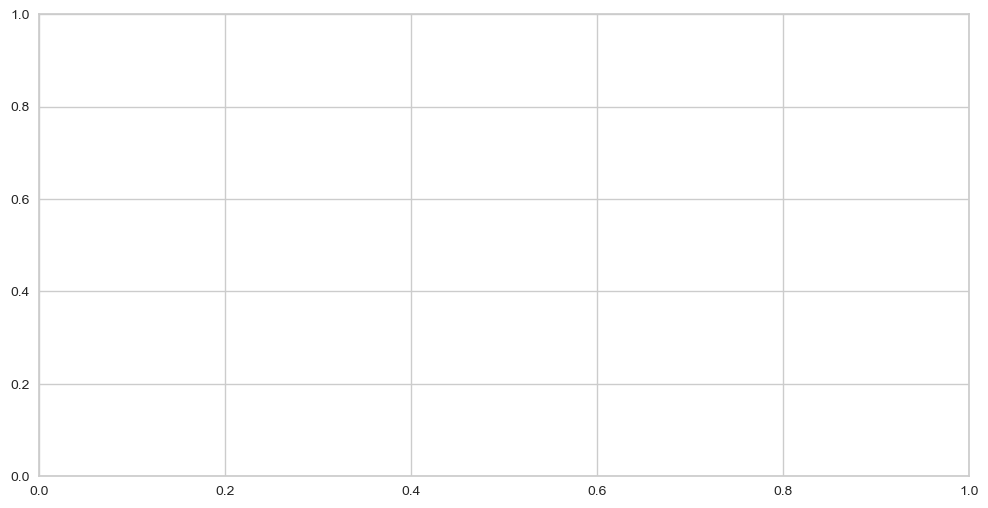

In [15]:
evaluate_model(create_model('svm', alpha = 100, 
                            class_weight = {0: 0.7849,
                                            1: 0.2035,
                                            2: 0.0196}))

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.7817,0.0000,0.7817,0.6111,0.6859,0.0000,0.0000
1,0.7817,0.0000,0.7817,0.6111,0.6859,0.0000,0.0000
2,0.7817,0.0000,0.7817,0.6111,0.6859,0.0000,0.0000
3,0.7817,0.0000,0.7817,0.6111,0.6859,0.0000,0.0000
4,0.7818,0.0000,0.7818,0.6111,0.6860,0.0000,0.0000
5,0.7818,0.0000,0.7818,0.6111,0.6860,0.0000,0.0000
6,0.7818,0.0000,0.7818,0.6112,0.6861,0.0000,0.0000
7,0.7818,0.0000,0.7818,0.6112,0.6861,0.0000,0.0000
8,0.7818,0.0000,0.7818,0.6112,0.6861,0.0000,0.0000


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

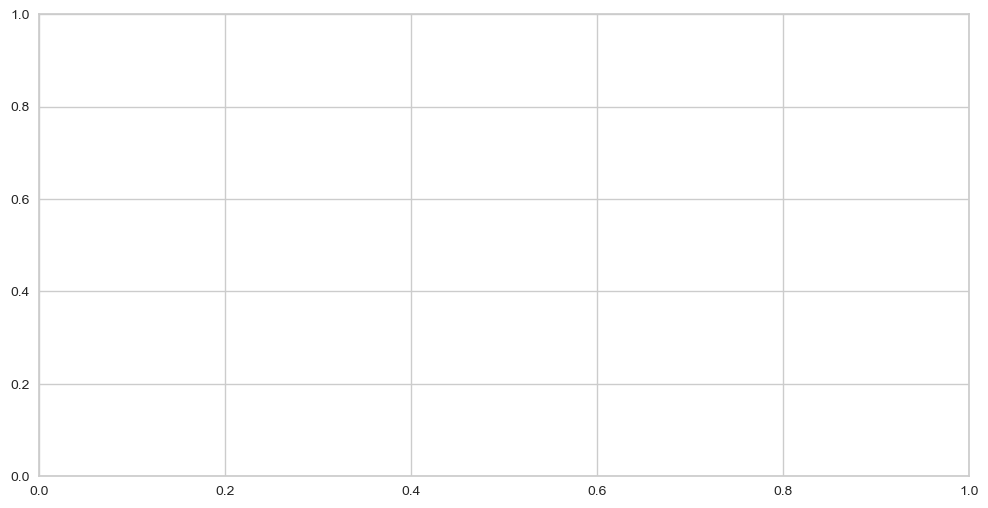

In [18]:
evaluate_model(create_model('svm', alpha = 100, 
                            class_weight = {
                                            1: 0.25,
                                            2: 0.75}))

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.7816,0.0000,0.7816,0.6110,0.6859,-0.0001,-0.0038
1,0.7818,0.0000,0.7818,0.8106,0.6862,0.0008,0.0203
2,0.7817,0.0000,0.7817,0.6111,0.6859,0.0000,0.0000
3,0.7817,0.0000,0.7817,0.7108,0.6860,0.0003,0.0075
4,0.7819,0.0000,0.7819,0.8107,0.6863,0.0008,0.0203
5,0.7817,0.0000,0.7817,0.6611,0.6861,0.0003,0.0060
6,0.7818,0.0000,0.7818,0.6112,0.6861,0.0000,0.0000
7,0.7818,0.0000,0.7818,0.7110,0.6862,0.0003,0.0075
8,0.7817,0.0000,0.7817,0.6112,0.6860,-0.0001,-0.0038


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

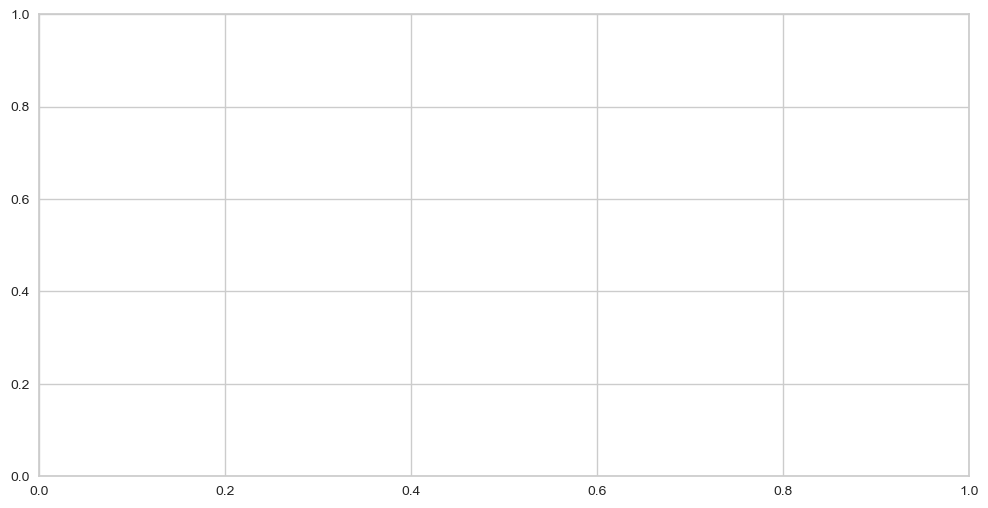

In [17]:
evaluate_model(create_model('svm', alpha = 50, 
                            class_weight = {0: 0.7849,
                                            1: 0.2035,
                                            2: 0.0196}))

In [12]:
tune_model(create_model('svm', alpha = 100))

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.7817,0.0000,0.7817,0.6111,0.6859,0.0000,0.0000
1,0.7818,0.0000,0.7818,0.8106,0.6861,0.0004,0.0144
2,0.7817,0.0000,0.7817,0.6111,0.6859,0.0000,0.0000
3,0.7818,0.0000,0.7818,0.8106,0.6861,0.0004,0.0144
4,0.7818,0.0000,0.7818,0.6111,0.6860,0.0000,0.0000
5,0.7817,0.0000,0.7817,0.6111,0.6860,-0.0001,-0.0038
6,0.7818,0.0000,0.7818,0.6112,0.6861,0.0000,0.0000
7,0.7818,0.0000,0.7818,0.6112,0.6861,0.0000,0.0000
8,0.7818,0.0000,0.7818,0.6112,0.6861,0.0000,0.0000


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.7820,0.0000,0.7820,0.7197,0.6876,0.0052,0.0370
1,0.7816,0.0000,0.7816,0.6860,0.6862,0.0010,0.0117
2,0.7817,0.0000,0.7817,0.6909,0.6862,0.0008,0.0118
3,0.7816,0.0000,0.7816,0.6111,0.6859,0.0001,0.0022
4,0.7816,0.0000,0.7816,0.6574,0.6863,0.0012,0.0115
5,0.7820,0.0000,0.7820,0.7012,0.6877,0.0055,0.0352
6,0.7817,0.0000,0.7817,0.6112,0.6860,-0.0001,-0.0038
7,0.7820,0.0000,0.7820,0.7361,0.6867,0.0020,0.0246
8,0.7818,0.0000,0.7818,0.6778,0.6862,0.0005,0.0092


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


SGDClassifier(alpha=0.2, average=False, class_weight=None, early_stopping=False,
              epsilon=0.1, eta0=0.001, fit_intercept=True,
              l1_ratio=0.1500000001, learning_rate='invscaling', loss='hinge',
              max_iter=1000, n_iter_no_change=5, n_jobs=-1, penalty='l2',
              power_t=0.5, random_state=3808, shuffle=True, tol=0.001,
              validation_fraction=0.1, verbose=0, warm_start=False)